##### Shanshan Li

According to dataset provided by the World Health Organization, an average of 800,000 people commit suicide   each year worldwide. As a result, suicide has become one of the most frequent means of death. Many countries lack preventive measures.

For this project, the dataset will be pull from the World Health Organization (WHO). The dataset is based on the suicide rate of over 100 countries all over the world between the years 1958 - 2016. We will analyze the suicide rate for each country based on different age groups and genders.    

Explore:
1. Compare the suicide rate between male and female to find out which has a higher suicide rate.
2. Find out which age group has the highest suicide rate throughout 1958-2016

In [ ]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import statsmodels.formula.api as smf
import os
import sys
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../utils')))

%matplotlib inline

## Dataset

#### --------------------------Data Description--------------------------
**country** : 101 countries included in dataset.

**year** : from years 1985 to 2016
 
**sex** : male  //  female

**age** : 5-14years  //  15-24years  //  25-34years  //  35-54years  //  55-74years  //  75+years

**suicides_no** : number of suicides committed

**population** : population
    
**suicides/100k pop** : number of suicides committed per 100,000 people in population

**gdp_per_capita** : gdp per capita in USD

#### ------------------------------------------------------------------------

In [ ]:
# imports dataset from local csv file
dataset = pd.read_csv('master.csv')
dataset.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [ ]:
#pulling out necessary variables used
dataset = dataset[['country', 'year', 'sex', 'age', 'suicides_no', 'population', 'suicides/100k pop', 'gdp_per_capita ($)']] 

In [ ]:
# finding the total # of countries in the dataset
countries = dataset['country'].unique()
countries

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Ecuador',
       'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia',
       'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary',
       'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia',
       'Lithuania', 'Luxembourg', 'Macau', 'Maldives', 'Malta',
       'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay',
       'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
       'Republic of Korea', 'Romania', '

In [ ]:
#number of countries in the dataset
countries.shape

(101,)

## Suicide Ratio Worldwide

In [ ]:
#gets the ratio of suicides committed each year
by_Year = dataset.groupby(by = ['year'])['suicides/100k pop'].mean().reset_index()

Text(0.5, 1.0, 'Worldwide Suicide Ratio from 1985 to 2016')

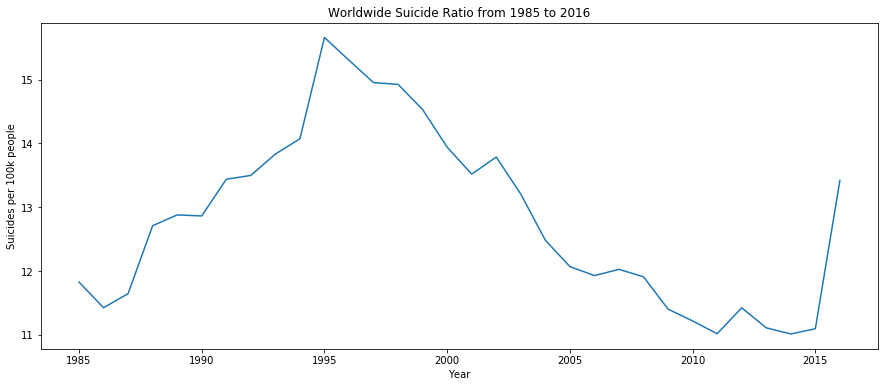

In [ ]:
fig = plt.figure(figsize=(15,6))
sns.lineplot(x='year', y = 'suicides/100k pop', data=by_Year)
plt.xlabel('Year')
plt.ylabel('Suicides per 100k people')
plt.title('Worldwide Suicide Ratio from 1985 to 2016')

In [ ]:
# year with the highest suicide rates
by_Year[by_Year['suicides/100k pop'] == np.max(by_Year['suicides/100k pop'])]

,year,suicides/100k pop
10,1995,15.662671


In [ ]:
# year with the lowest suicide rates
by_Year[by_Year['suicides/100k pop'] == np.min(by_Year['suicides/100k pop'])]

,year,suicides/100k pop
29,2014,11.011464


In [ ]:
countries = dataset.groupby(by = ['country', 'year'])['suicides_no'].sum().reset_index()

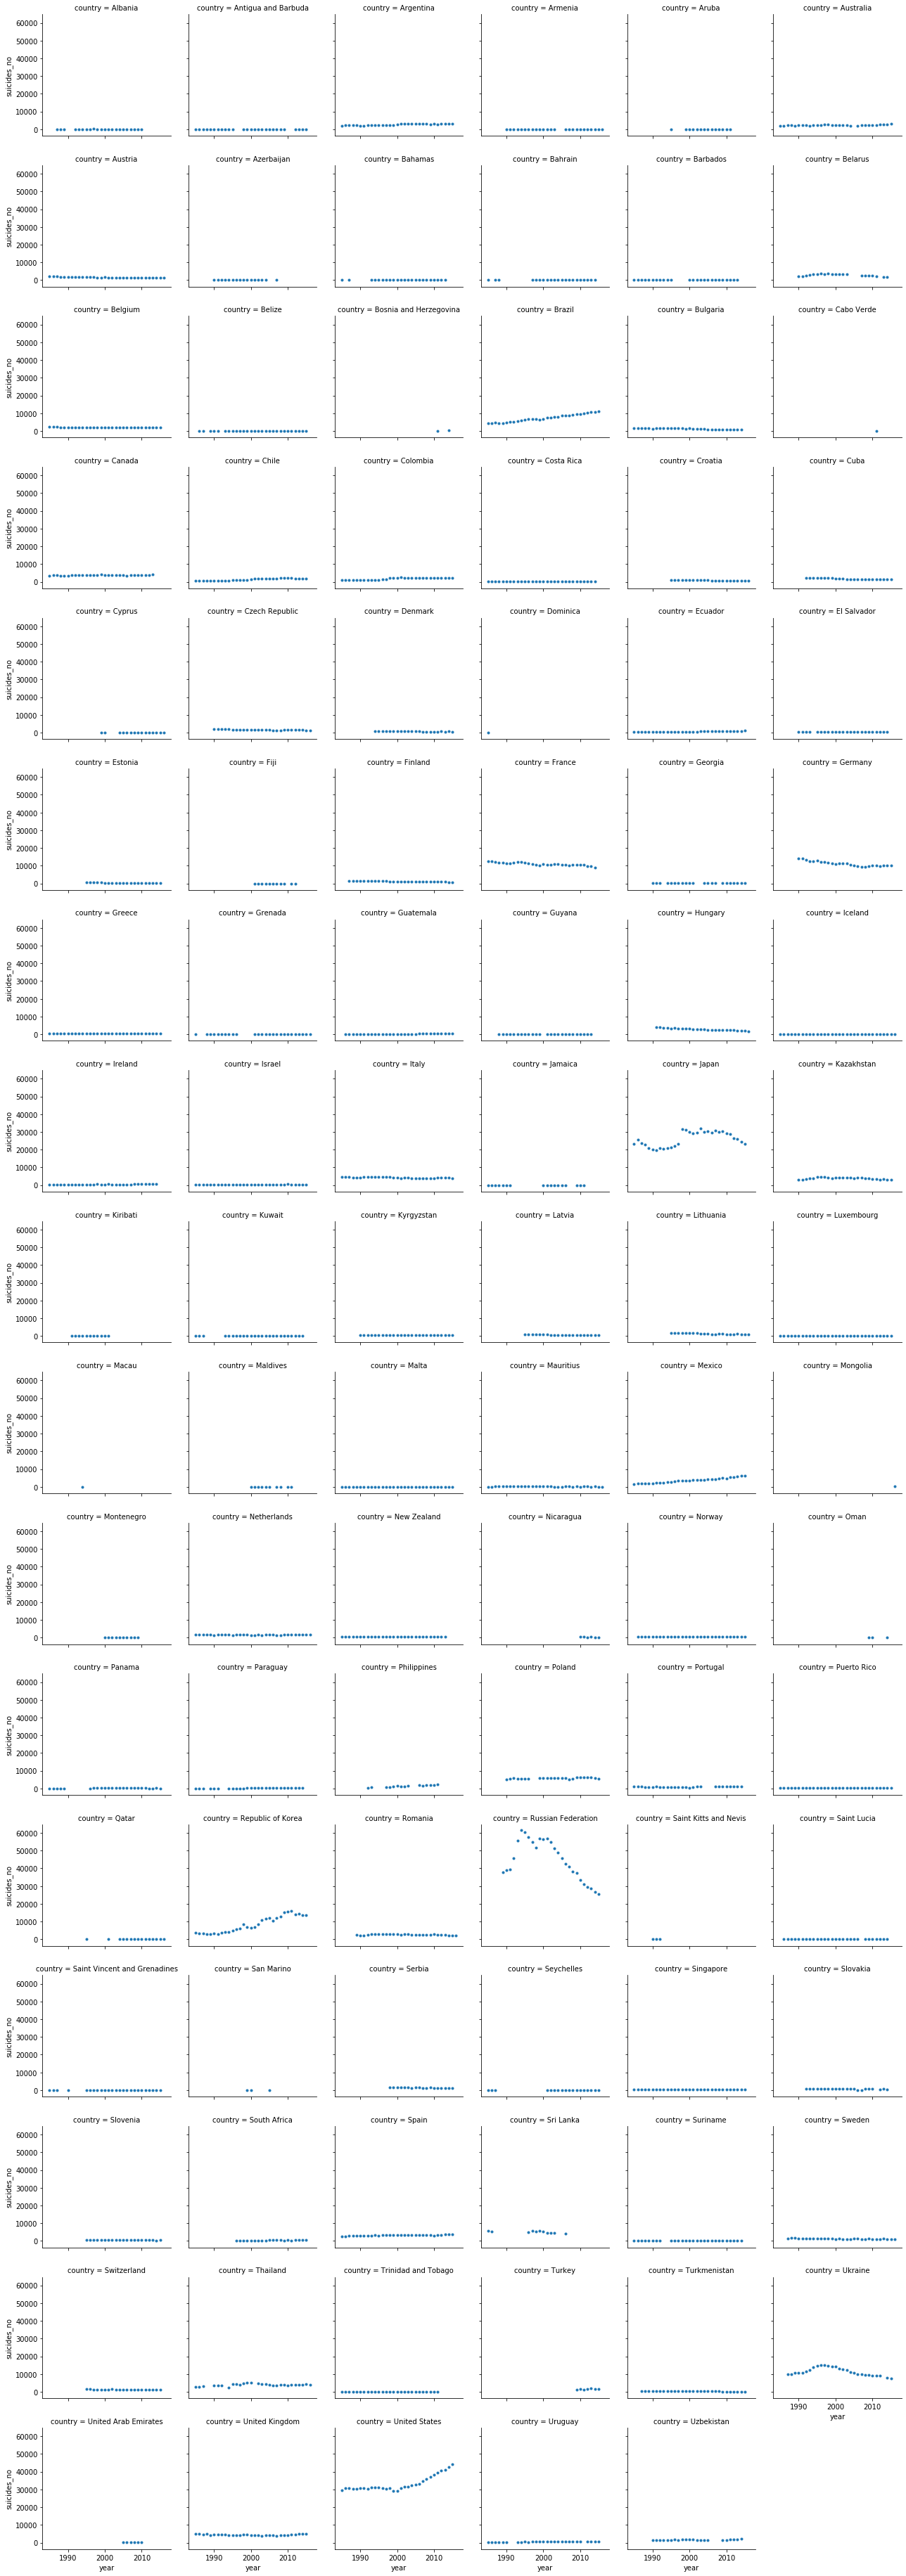

In [ ]:
g = sns.FacetGrid(countries, col="country", col_wrap=6)
g = g.map(plt.scatter, "year", "suicides_no", marker=".")

    The graph above shows the number of suicide committed throughout 1958-2016 in each countries presented in the dataset. From the data above, we can observe that Russian Federation have a high number of suicide committed following next with United States and Japan.
    *******Suicide rate are too low in many countries to be observe and compared in this graph.

In [ ]:
#countries for only 1995.
only_1995 = dataset[dataset['year']==1995]
countries_1995 = only_1995.groupby(by = ['country'])['suicides_no'].sum().reset_index()

#the suicide_no/sum of suicides_no worldwide in 1995
countries_1995['percentage'] = countries_1995['suicides_no']/countries_1995['suicides_no'].sum()

In [ ]:
#    The 5 Countries with the HIGHEST suicides number in 1995
countries_1995.sort_values('suicides_no', ascending=False).head(5)

,country,suicides_no,percentage
60,Russian Federation,60548,0.248612
75,United States,31272,0.128404
39,Japan,21249,0.087249
73,Ukraine,14541,0.059706
29,Germany,12888,0.052919


In [ ]:
russia_1995 = only_1995[only_1995['country']=='Russian Federation']
age_1995 = russia_1995.groupby('age')['suicides_no'].sum().reset_index()

In [ ]:
#    total suicide number in 1995 by age group
age_1995.sort_values('suicides_no', ascending=False).head(6)

,age,suicides_no
2,35-54 years,25034
4,55-74 years,14651
1,25-34 years,10966
0,15-24 years,6736
5,75+ years,2728
3,5-14 years,433


## TOP 10 Countries with the Highest and Loweset Suicide Ratios

### -----------------------------1958 to 2016-----------------------------

In [ ]:
#gets the ratio of suicides committed each year
by_Country = dataset.groupby(by = ['country'])[
    'suicides/100k pop'].mean().reset_index().sort_values('suicides/100k pop')

In [ ]:
#    The 10 Countries with the HIGHEST suicide ratios
by_Country.sort_values('suicides/100k pop', ascending=False).head(10)

,country,suicides/100k pop
52,Lithuania,40.415573
87,Sri Lanka,35.295152
75,Russian Federation,34.892377
40,Hungary,32.761516
11,Belarus,31.075913
47,Kazakhstan,30.511282
51,Latvia,29.259325
84,Slovenia,27.827857
30,Estonia,27.276905
95,Ukraine,26.582321


In [ ]:
#     The 10 Countries with the LOWEST suicide ratios
by_Country.sort_values('suicides/100k pop').head(10)

,country,suicides/100k pop
76,Saint Kitts and Nevis,0.000000
27,Dominica,0.000000
45,Jamaica,0.521765
1,Antigua and Barbuda,0.552901
65,Oman,0.736111
85,South Africa,0.964542
49,Kuwait,1.186433
8,Bahamas,1.247391
96,United Arab Emirates,1.317917
55,Maldives,1.367333


### -----------------------------2010 to 2016-----------------------------

In [ ]:
#    gets the ratio of suicides committed from ONLY 2010-2016
only_2010 = dataset[(dataset['year'] >= 2010 )]
by_Country2010 = only_2010.groupby(by = ['country'])[
    'suicides/100k pop'].mean().reset_index().sort_values('suicides/100k pop')

In [ ]:
#    the 10 Countries with the HIGHEST suicide ratios
by_Country2010.sort_values('suicides/100k pop', ascending=False).head(10)

,country,suicides/100k pop
68,Republic of Korea,37.215972
49,Lithuania,33.781463
80,Suriname,31.281000
37,Guyana,30.770000
10,Belarus,24.116042
38,Hungary,23.613049
45,Kazakhstan,23.296806
70,Russian Federation,23.257083
77,Slovenia,22.433194
48,Latvia,21.642222


In [ ]:
#    the 10 Countries with the LOWEST suicide ratios
by_Country2010.sort_values('suicides/100k pop').head(10)

,country,suicides/100k pop
9,Barbados,0.158750
60,Oman,0.221250
51,Maldives,0.307500
1,Antigua and Barbuda,0.325417
35,Grenada,0.472439
8,Bahrain,0.742333
46,Kuwait,1.046333
78,South Africa,1.096389
43,Jamaica,1.209167
67,Qatar,1.310244


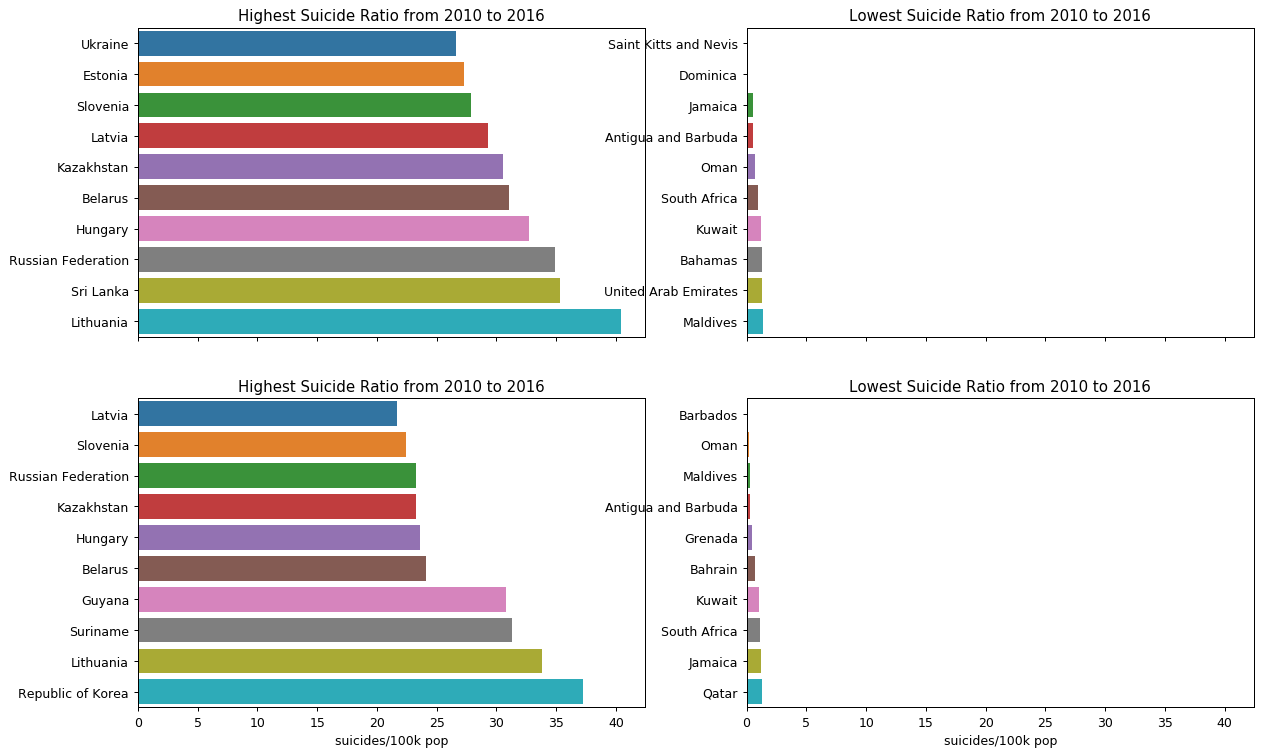

In [ ]:
fig, (ax1, ax2) =plt.subplots(2,2, figsize=(16,10), dpi=90, sharex=True)

ax1[0].set_title('Highest Suicide Ratio from 2010 to 2016')
sns.barplot(x='suicides/100k pop', y='country', data=by_Country[-10:], ax=ax1[0])
ax1[0].xaxis.label.set_visible(False)
ax1[0].yaxis.label.set_visible(False)

ax1[1].set_title('Lowest Suicide Ratio from 2010 to 2016')
sns.barplot(x='suicides/100k pop', y='country', data=by_Country[:10], ax=ax1[1])
ax1[1].xaxis.label.set_visible(False)
ax1[1].yaxis.label.set_visible(False)

ax2[0].set_title('Highest Suicide Ratio from 2010 to 2016')
sns.barplot(x='suicides/100k pop', y='country', data=by_Country2010[-10:], ax=ax2[0])
ax2[0].yaxis.label.set_visible(False)

ax2[1].set_title('Lowest Suicide Ratio from 2010 to 2016')
sns.barplot(x='suicides/100k pop', y='country', data=by_Country2010[:10], ax=ax2[1])
ax2[1].yaxis.label.set_visible(False)

## Suicide Rate between Male and Female

In [ ]:
dataset.groupby('sex').count()

,country,year,age,suicides_no,population,suicides/100k pop,gdp_per_capita ($)
sex,,,,,,,
female,13910,13910,13910,13910,13910,13910,13910
male,13910,13910,13910,13910,13910,13910,13910


In [ ]:
dataset[(dataset['sex']=='female')].shape

(13910, 8)

In [ ]:
dataset[(dataset['sex']=='male')].shape

(13910, 8)

In [ ]:
female_Ratio = dataset[(dataset['sex']=='female')]['suicides/100k pop']
male_Ratio = dataset[(dataset['sex']=='male')]['suicides/100k pop']

In [ ]:
#the mean '
np.mean(female_Ratio)

5.3928662832494885

In [ ]:
#
np.mean(male_Ratio)

20.239328540618263

In [ ]:
#the difference in these mean
np.mean(male_Ratio)-np.mean(female_Ratio)

14.846462257368774

Text(0.5, 1.0, 'Suicide Rate -- Male vs Female by AGE')

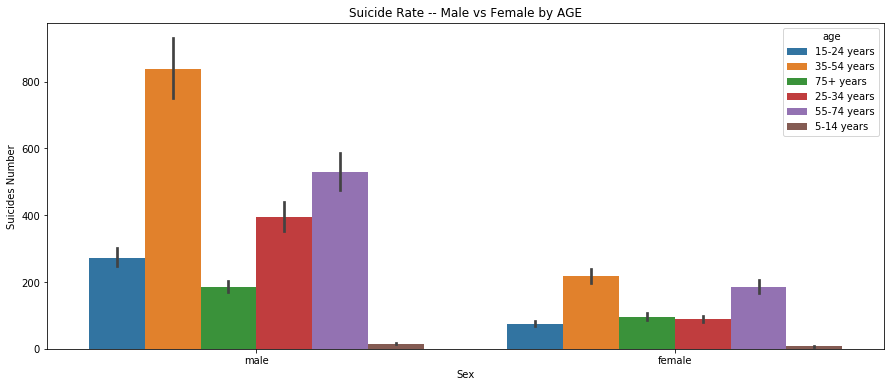

In [ ]:
fig = plt.figure(figsize=(15,6))
sns.barplot(x='sex', y='suicides_no', hue='age', data=dataset)
plt.xlabel('Sex')
plt.ylabel('Suicides Number')
plt.title('Suicide Rate -- Male vs Female by AGE')

    The bargraph above shows the number of suicides commmited between male and female by different age groups. We can see that the males take up a higher suicide rate than female. Suicide rate is the highest from ages 35-54 for both genders, whereas it is lowest from ages 5-14.


In [ ]:
female = dataset[(dataset['sex']=='female')]
male = dataset[(dataset['sex']=='male')]

Text(0.5, 1.0, 'Suicide Rate -- Male vs Female from 1985-2016')

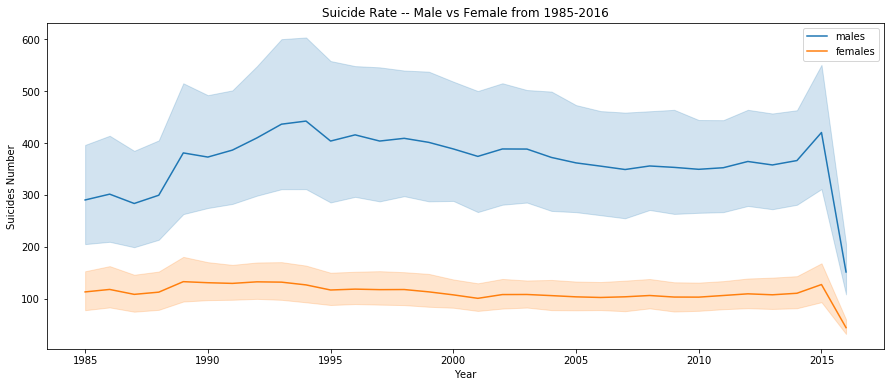

In [ ]:
fig = plt.figure(figsize=(15,6))
sns.lineplot(x='year', y='suicides_no', data=male)
sns.lineplot(x='year', y='suicides_no', data=female)
plt.legend(['males', 'females'])
plt.xlabel('Year')
plt.ylabel('Suicides Number')
plt.title('Suicide Rate -- Male vs Female from 1985-2016')

    The linegraph above shows the changes in the number of suicides commmited between male and female from 1985 to 2016.

In [ ]:
M = male.groupby(by = ['year', 'age'])['suicides_no'].mean().reset_index()
F = female.groupby(by = ['year', 'age'])['suicides_no'].mean().reset_index()

Text(0.5, 1.0, 'Suicide Rate -- Female from 1985-2016')

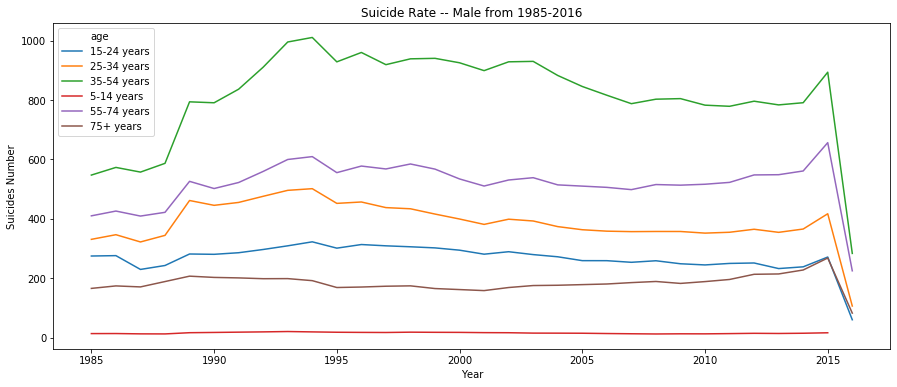

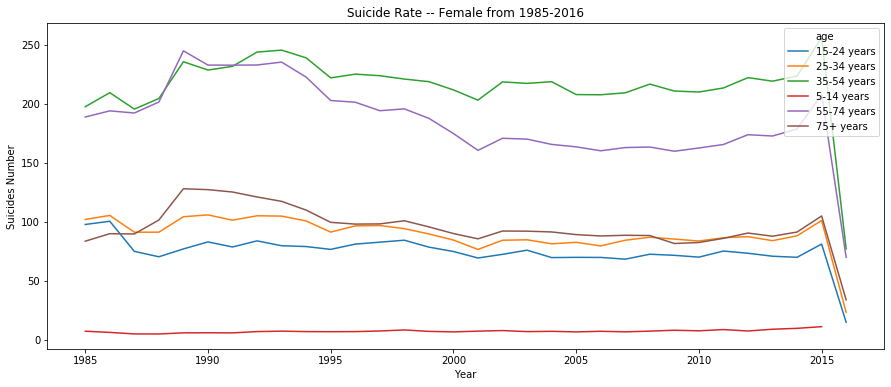

In [ ]:
fig = plt.figure(figsize=(15,6))
sns.lineplot(x='year', y='suicides_no', hue='age', data=M)
plt.xlabel('Year')
plt.ylabel('Suicides Number')
plt.title('Suicide Rate -- Male from 1985-2016')

fig = plt.figure(figsize=(15,6))
sns.lineplot(x='year', y='suicides_no', hue='age', data=F)
plt.xlabel('Year')
plt.ylabel('Suicides Number')
plt.title('Suicide Rate -- Female from 1985-2016')

    Rate of suicides have been declining for both males and females, however, there has been a significant uptick for females in age groups 55+ in 2015.

In [ ]:
countries_sex = dataset.groupby(by = ['country', 'sex'])['suicides_no'].sum().reset_index()

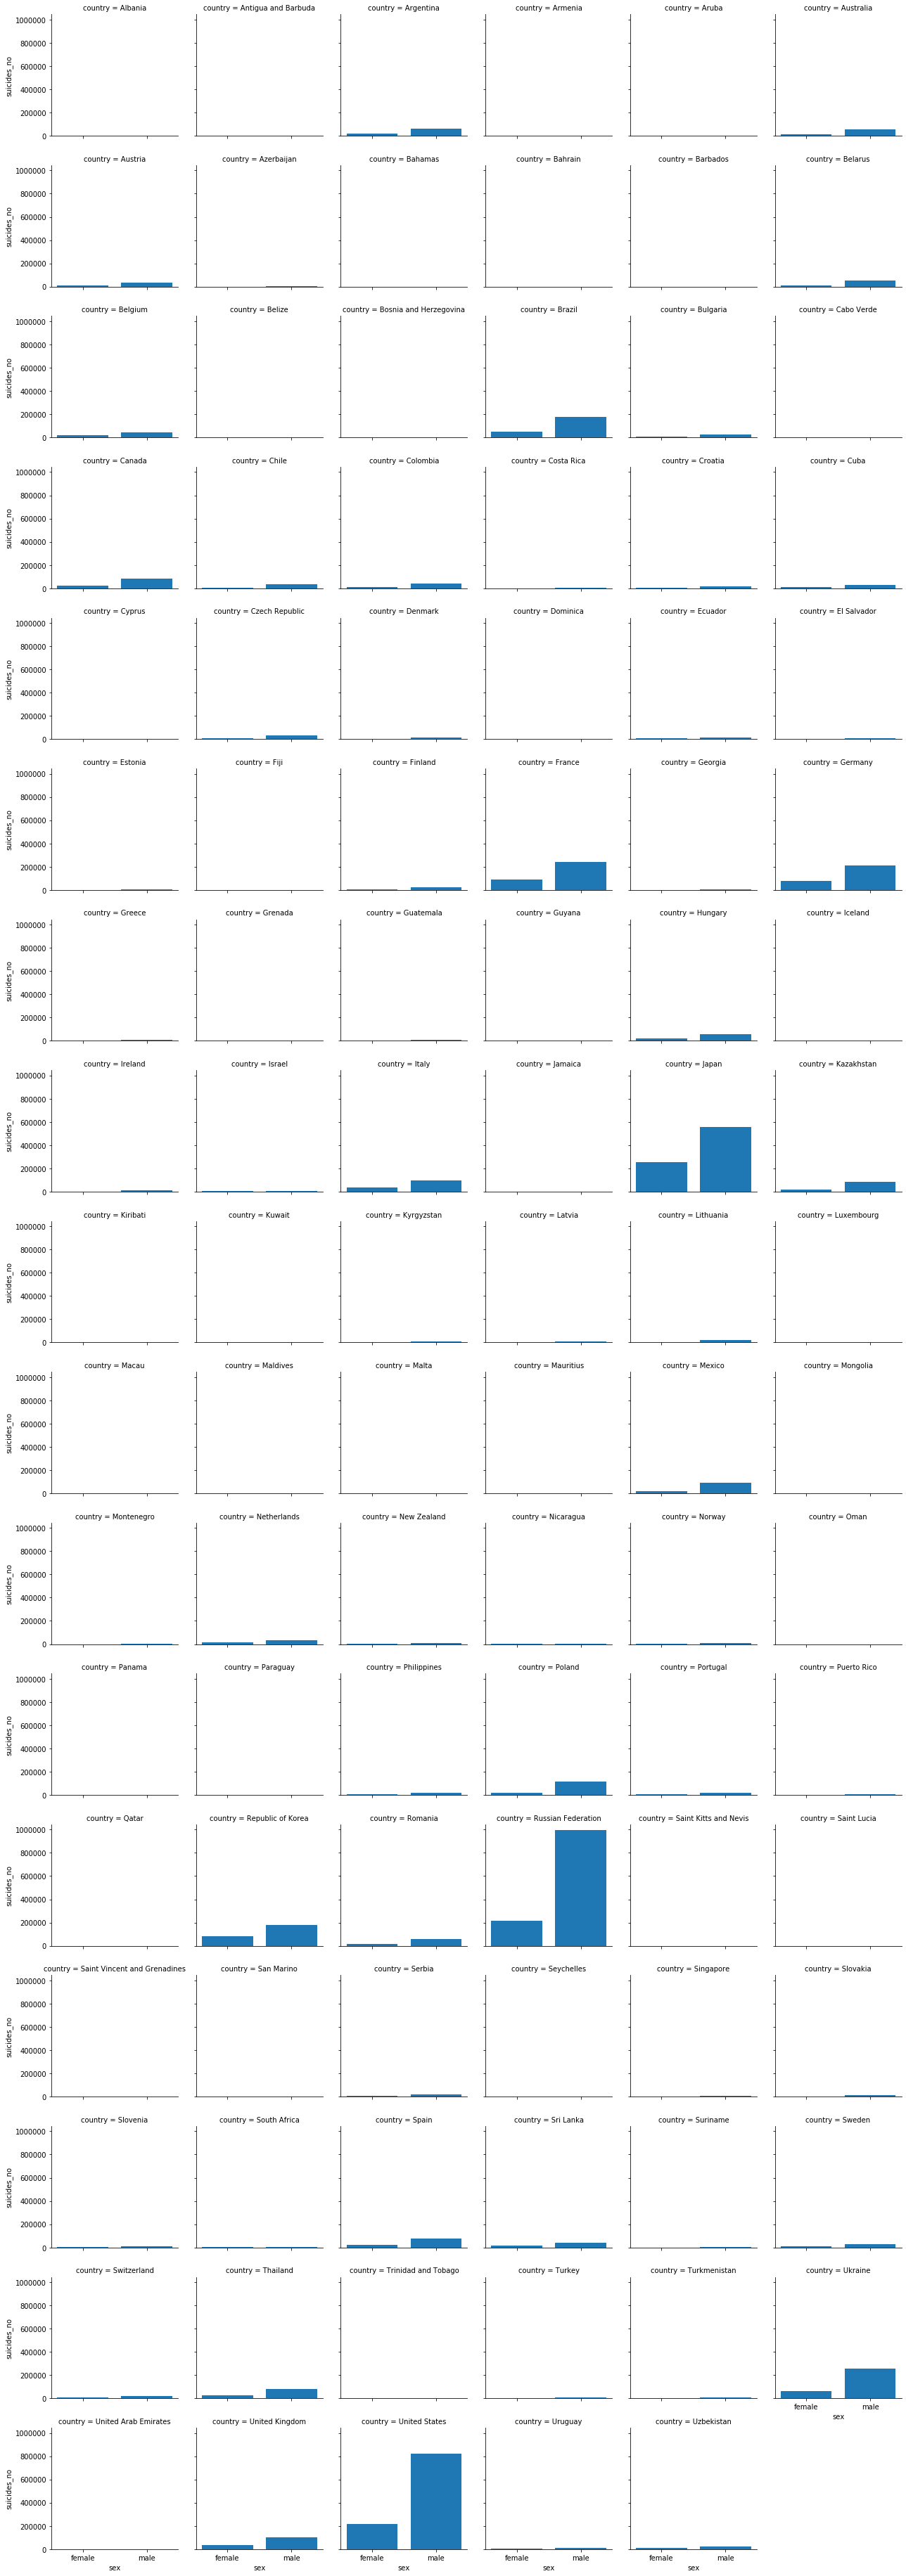

In [ ]:
g = sns.FacetGrid(countries_sex, col="country", col_wrap=6)
g = g.map(plt.bar, "sex", "suicides_no")

    The number of suicide committed between male and female in different countries.

(array([  24.,  129.,  617., 1670., 2887., 2662., 1459.,  458.,   87.,
           7.]),
 array([-0.84895687, -0.67637024, -0.50378361, -0.33119698, -0.15861035,
         0.01397628,  0.1865629 ,  0.35914953,  0.53173616,  0.70432279,
         0.87690942]),
 <a list of 10 Patch objects>)

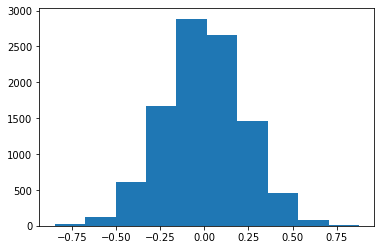

In [ ]:
np.random.seed(42)
diff = []
for i in range(10000):
    total = np.concatenate((male_Ratio, female_Ratio), axis=None)
    np.random.shuffle(total)
    new_male = total[:len(male_Ratio)]
    new_female = total[len(female_Ratio):]
    diff.append(np.mean(new_male) - np.mean(new_female))
plt.hist(diff)

In [ ]:
print('Rejection Region: Less than', np.percentile(diff, 2.5))
print('Rejection Region: Less than', np.percentile(diff, 97.5))

Rejection Region: Less than -0.4576758806613962
Rejection Region: Less than 0.4385209202012944


In [ ]:
stats.percentileofscore(diff, 14.85)

100.0

In [ ]:
(1 - ((stats.percentileofscore(diff, 18.77))/100)) * 2

0.0

## Suicide rate vs GDP per capita

    For this next section I will compare the suicide rate with the GDP per capita.

In [ ]:
countries = dataset.groupby(by = ['year'])['suicides/100k pop', 'gdp_per_capita ($)'].mean().reset_index()
countries.head()

,year,suicides/100k pop,gdp_per_capita ($)
0,1985,11.826198,6091.229167
1,1986,11.423333,7126.104167
2,1987,11.644213,8712.592593
3,1988,12.709405,9983.857143
4,1989,12.879071,9725.038462


Text(0.5, 1.0, 'GDP per capita (in USD) from 1985 to 2016')

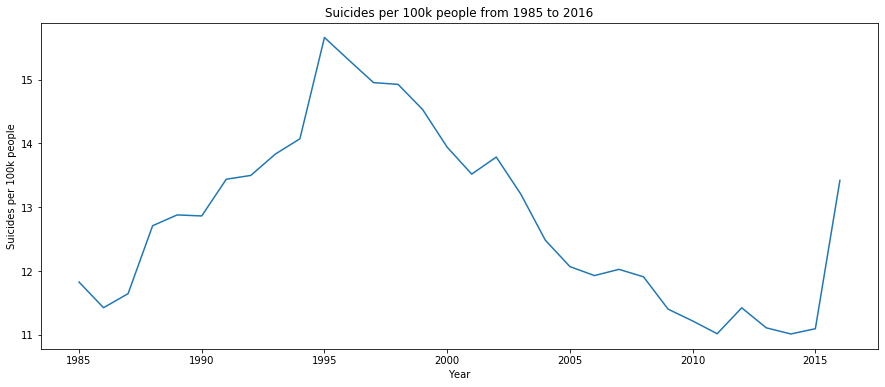

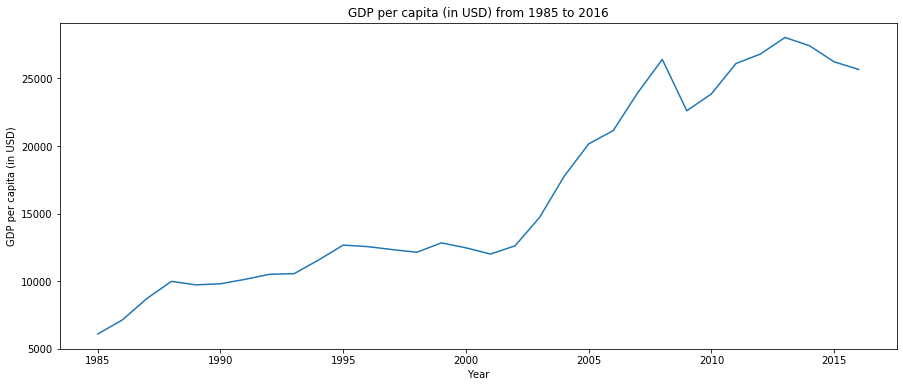

In [ ]:
fig = plt.figure(figsize=(15,6))
sns.lineplot(x='year', y='suicides/100k pop', data=countries)
plt.xlabel('Year')
plt.ylabel('Suicides per 100k people')
plt.title('Suicides per 100k people from 1985 to 2016')

fig = plt.figure(figsize=(15,6))
sns.lineplot(x='year', y='gdp_per_capita ($)', data=countries)
plt.xlabel('Year')
plt.ylabel('GDP per capita (in USD)')
plt.title('GDP per capita (in USD) from 1985 to 2016')

In [ ]:
SR = countries['suicides/100k pop']
GDP = countries['gdp_per_capita ($)']

Text(0.5, 0.92, 'Relationship Between Suicide Rate and GDP per Capita each year')

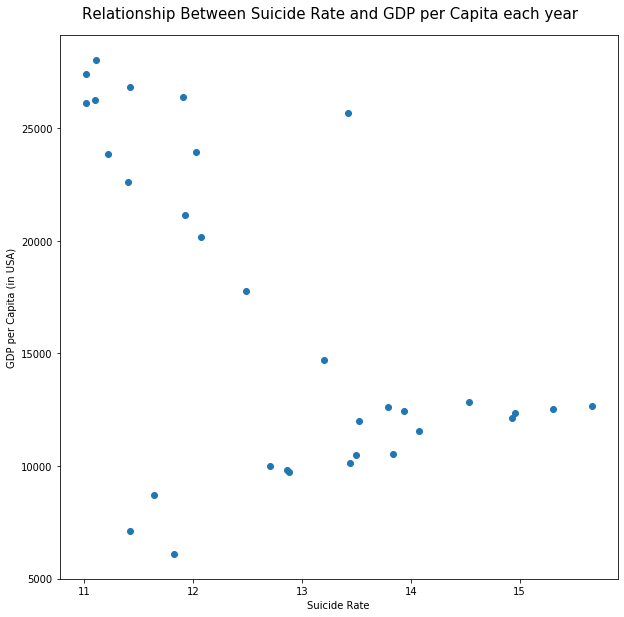

In [ ]:
fig = plt.figure(figsize=(10,10))
plt.scatter(SR, GDP)
plt.xlabel('Suicide Rate')
plt.ylabel('GDP per Capita (in USA)')
fig.suptitle('Relationship Between Suicide Rate and GDP per Capita each year', fontsize=15, y=0.92)

In [ ]:
print('Correlation:', stats.pearsonr(SR, GDP)[0])

Correlation: -0.5580217508696946


In [ ]:
def evaluate_linear_relationship(a, b):
    slope = np.cov(a, b, bias=True)[0][1] / np.var(a)
    intercept = np.mean(b) - (slope * np.mean(a))
    predictions = (slope * a) + intercept
    residuals = b - predictions
    return slope, intercept, predictions, residuals

In [ ]:
slope, intercept, predictions, residuals = evaluate_linear_relationship(SR, GDP)

In [ ]:
print('Slope:', slope)
print('Intercept:', intercept)
print('R-squared value: :', np.power(stats.pearsonr(SR, GDP)[0], 2))

Slope: -2878.170850340976
Intercept: 53283.33383880098
R-squared value: : 0.31138827444367956


Text(0.5, 0.92, 'Relationship Between Suicide Rate and GDP per Capita each year')

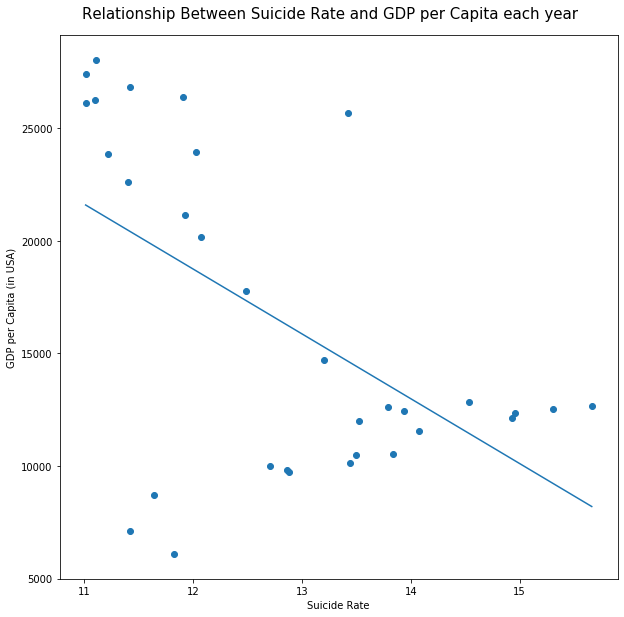

In [ ]:
#   the regression of this relation
fig = plt.figure(figsize=(10,10))
plt.scatter(SR, GDP)
sorted_order = np.argsort(SR)
plt.plot(SR[sorted_order], predictions[sorted_order])
plt.xlabel('Suicide Rate')
plt.ylabel('GDP per Capita (in USA)')
fig.suptitle('Relationship Between Suicide Rate and GDP per Capita each year', fontsize=15, y=0.92)

Text(0.5, 0.92, 'Relationship Between Suicide Rate and GDP per Capita each year')

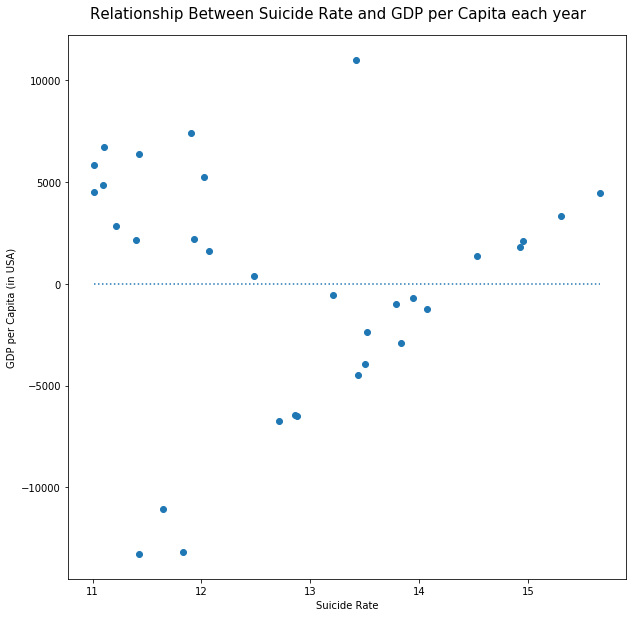

In [ ]:
#   the residuals plot for this relationship
fig = plt.figure(figsize=(10,10))
plt.scatter(SR, residuals)
sorted_order = np.argsort(SR)
plt.plot([SR.min(), SR.max()], [0,0], linestyle='dotted')
plt.xlabel('Suicide Rate')
plt.ylabel('GDP per Capita (in USA)')
fig.suptitle('Relationship Between Suicide Rate and GDP per Capita each year', fontsize=15, y=0.92)

In [ ]:
est = smf.ols('GDP ~ SR', countries).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GDP   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                     13.57
Date:                Fri, 13 Dec 2019   Prob (F-statistic):           0.000905
Time:                        01:17:16   Log-Likelihood:                -322.79
No. Observations:                  32   AIC:                             649.6
Df Residuals:                      30   BIC:                             652.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.328e+04   1.01e+04      5.291      0.000    3.27e+04    7.39e+04
SR         -2878.1709    781.433     -3.683      0.001   -4474.071   -1282.271
==============================================================================
Omnibus:                        2.747   Durbin-Watson:                   0.154
Prob(Omnibus):                  0.253   Jarque-Bera (JB):                2.115
Skew:                          -0.629   Prob(JB):                        0.347
Kurtosis:                       2.931   Cond. No.                         123.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""